In [ ]:
# Modify this to locate the directory of source folder
%cd /drive/sourcefolder

/content/drive/.shortcut-targets-by-id/1KFmB9Bc-wUD77LbIZgFHRaaq9mfsR5Ry/rCoronavirusFYP_Zachary_source


# Import libraries

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np
import datetime
import nltk
import math
# from tqdm import tqdm
from tqdm.auto import tqdm

# For Sentiment Analysis
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# For Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
!pip install pyLDAvis
import pyLDAvis
from wordcloud import WordCloud
# For word cloud masking
import PIL
from PIL import Image

# For Topic Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install --pre --upgrade gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import spacy

# For gensim logging
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

CUSTOM_STOPWORDS = STOPWORDS.union(set(['can', 'say']))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


     |████████████████████████████████| 1.7MB 12.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 268kB/s 
     |████████████████████████████████| 9.9MB 44.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=58209ab0abe54ec7da6f6cc21e8da6a5d7c7de3a70c7111f0cfdc586061f9d71
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



     |████████████████████████████████| 23.9MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [ ]:
# Word cloud mask
mask_covid = np.array(Image.open('masks/mask_covid.png'))

# Remove overlapping words in positive and negative submissions
new_stopwords = {'coronavirus', 'covid', 'corona', 'virus', 'pandemic'}
CLOUD_STOPWORDS = STOPWORDS.union(new_stopwords)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off")

# Observing the trend of COVID-19 Cases (using external data)
-----





In [ ]:
df_covid_data = pd.read_csv('dataset\owid-covid-data.csv')

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
df_covid_data = df_covid_data[df_covid_data.location == 'World']

In [ ]:
df_world = df_world[['date','new_cases','total_cases']]
display(df_world)

date  new_cases  total_cases
72973  2020-01-22        0.0        557.0
72974  2020-01-23       98.0        655.0
72975  2020-01-24      286.0        941.0
72976  2020-01-25      492.0       1433.0
72977  2020-01-26      685.0       2118.0
...           ...        ...          ...
73384  2021-03-08   298554.0  117212234.0
73385  2021-03-09   415316.0  117627550.0
73386  2021-03-10   467098.0  118094648.0
73387  2021-03-11   476826.0  118571474.0
73388  2021-03-12   489009.0  119060483.0

[416 rows x 3 columns]

In [ ]:
# Remove data after Jan 31 2021
df_world = df_world[df_world['date'] < '2021-02-01']
print(df_world.shape)

(376, 3)


In [ ]:
df_world['month'] = df_world['date'].map(lambda x: datetime.date.fromisoformat(x).strftime('%Y-%m'))

E:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_world['week'] = df_world['date'].map(lambda x: datetime.date.fromisoformat(x).strftime('%Y-Wk%W'))

In [ ]:
df_world.groupby(['week'])['new_cases'].sum()

week
2020-Wk03       1561.0
2020-Wk04      14669.0
2020-Wk05      23373.0
2020-Wk06      31075.0
2020-Wk07       7747.0
2020-Wk08       9412.0
2020-Wk09      21653.0
2020-Wk10      59172.0
2020-Wk11     174986.0
2020-Wk12     389450.0
2020-Wk13     522526.0
2020-Wk14     592886.0
2020-Wk15     569240.0
2020-Wk16     555206.0
2020-Wk17     550286.0
2020-Wk18     587403.0
2020-Wk19     610526.0
2020-Wk20     699901.0
2020-Wk21     766555.0
2020-Wk22     840475.0
2020-Wk23     897020.0
2020-Wk24    1011616.0
2020-Wk25    1190745.0
2020-Wk26    1336638.0
2020-Wk27    1457753.0
2020-Wk28    1588764.0
2020-Wk29    1751776.0
2020-Wk30    1821127.0
2020-Wk31    1791631.0
2020-Wk32    1815391.0
2020-Wk33    1749511.0
2020-Wk34    1805443.0
2020-Wk35    1907296.0
2020-Wk36    1895373.0
2020-Wk37    2038773.0
2020-Wk38    2060515.0
2020-Wk39    2073266.0
2020-Wk40    2344735.0
2020-Wk41    2501345.0
2020-Wk42    3007893.0
2020-Wk43    3529371.0
2020-Wk44    3950517.0
2020-Wk45    4080061.0
2020-W

In [ ]:
df_world.to_pickle('data_covid_global.pkl')

# Sentiment Analysis with VADER

1. Swapping the words "positive" and "negative" for more accurate sentiment in terms like "tested positive"
2. Score-weighted sentiment score
-----

In [ ]:
df = pd.read_pickle("pickle/submissions_processed.pkl")
display(df.head())

id  score  ...   month  week
0  erj61t      1  ...  Jan-20    03
1  es0m55      1  ...  Jan-20    03
2  es1pn4      1  ...  Jan-20    03
3  es2ooq      1  ...  Jan-20    03
4  es7jnl      1  ...  Jan-20    03

[5 rows x 7 columns]

### Swapping the words "positive" and "negative"
-----

In [ ]:
# Swap variations of 'positive' and 'negative'
df['title'].replace(regex={r'[pP]ositive': 'negative', r'[pP]ositivity rate': 'negativity rate', r'[nN]egative':'positive'}, inplace=True)

In [ ]:
# Perform sentiment analysis on text and extract compound score
# Classify data as positive, negative, or neutral

df['compound_score'] = df['title'].apply(lambda submission: sid.polarity_scores(submission)['compound'])
df['sentiment'] = df['compound_score'].apply(lambda c: 'positive' if c>=0.05 else ('negative' if c<=-0.05 else 'neutral'))

In [ ]:
# Swap back the terms again to restore original text
df['title'].replace(regex={r'negative': 'positive', r'negativity rate': 'positivity rate', r'positive':'negative'}, inplace=True)

In [ ]:
df.groupby(['sentiment']).size()

sentiment
negative    123851
neutral     151801
positive     79806
dtype: int64

### Calculate score-weighted sentiment
-----

In [ ]:
df['score'].describe()

count    268109.000000
mean         19.932591
std         619.709156
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       77296.000000
Name: score, dtype: float64

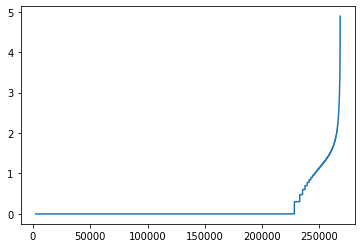

In [ ]:
df['score'].transform(np.log10).sort_values().reset_index(drop=True).plot()

In [ ]:
log_score = np.log10(df['score']+1)
log_score.describe()

count    268109.000000
mean          0.430607
std           0.388899
min           0.000000
25%           0.301030
50%           0.301030
75%           0.301030
max           4.888163
Name: score, dtype: float64

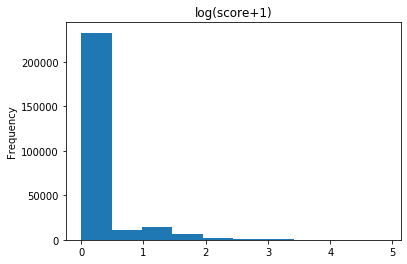

In [ ]:
log_score.plot(kind='hist', title='log(score+1)')

In [ ]:
def compute_scoreweightsentiment(row):
  '''
  score-weighted sentiment = vader compound score * log(score + 1)
  '''
  if row['sentiment'] == 'neutral':
      return row['compound_score']
  return np.log10(row['score']+1) * row['compound_score']

In [ ]:
df['score_weighted_sentiment'] = df.apply(compute_scoreweightsentiment, axis=1)
df['score_weighted_sentiment'] = df.score_weighted_sentiment.round(4)

In [ ]:
fig = px.scatter(df, y='score_weighted_sentiment', x='month', color='score_weighted_sentiment', color_continuous_scale='Rdbu_r', color_continuous_midpoint=0, 
    labels={'score_weighted_sentiment':'Score-weighted Sentiment', 'month':'Month'})

fig.show()

## Observe sentiment trend in submissions across the year
-----

In [ ]:
# Load submissions_sentiment.pkl, which contains VADER sentiment score and score_weighted_sentiment

df = pd.read_pickle('pickle/submissions_sentiment.pkl')

In [ ]:
df

id  score  ...  sentiment  score_weighted_sentiment
0       erj61t      1  ...   negative                   -0.0891
1       es0m55      1  ...    neutral                    0.0000
2       es1pn4      1  ...    neutral                    0.0000
3       es2ooq      1  ...   positive                    0.1149
4       es7jnl      1  ...    neutral                    0.0000
...        ...    ...  ...        ...                       ...
356685  l9eu4n      6  ...    neutral                    0.0000
356686  l9ev4o    386  ...   positive                    1.4033
356687  l9ewn6      2  ...    neutral                    0.0000
356688  l9ex9u    157  ...   negative                   -1.4505
356689  l9f3g9     55  ...    neutral                    0.0000

[355458 rows x 10 columns]

In [ ]:
df2 = df.groupby(['week', 'sentiment']).size().reset_index(name='number_of_submissions')
df2.sort_values(by='number_of_submissions', ascending=False).head(10)

week sentiment  number_of_submissions
22  2020-Wk10   neutral                  15369
25  2020-Wk11   neutral                  13004
21  2020-Wk10  negative                  12066
24  2020-Wk11  negative                  10921
28  2020-Wk12   neutral                  10407
27  2020-Wk12  negative                   9274
19  2020-Wk09   neutral                   8500
31  2020-Wk13   neutral                   8108
26  2020-Wk11  positive                   7985
30  2020-Wk13  negative                   7514

In [ ]:
# Load external data that was previously obtained
df_world = pd.read_pickle('pickle/data_covid_global.pkl')
display(df_world)

date  new_cases  total_cases    month       week
72973  2020-01-22        0.0        557.0  2020-01  2020-Wk03
72974  2020-01-23       98.0        655.0  2020-01  2020-Wk03
72975  2020-01-24      286.0        941.0  2020-01  2020-Wk03
72976  2020-01-25      492.0       1433.0  2020-01  2020-Wk03
72977  2020-01-26      685.0       2118.0  2020-01  2020-Wk03
...           ...        ...          ...      ...        ...
73344  2021-01-27   597914.0  100923844.0  2021-01  2021-Wk04
73345  2021-01-28   614649.0  101538493.0  2021-01  2021-Wk04
73346  2021-01-29   590122.0  102128615.0  2021-01  2021-Wk04
73347  2021-01-30   515105.0  102643720.0  2021-01  2021-Wk04
73348  2021-01-31   382395.0  103026115.0  2021-01  2021-Wk04

[376 rows x 5 columns]

In [ ]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

weeks = df2['week'].unique()

fig.add_trace(go.Scatter(x=weeks, y=df2[df2['sentiment']=='positive']['number_of_submissions'], mode='lines', name='Positive', line_color='salmon'))
fig.add_trace(go.Scatter(x=weeks, y=df2[df2['sentiment']=='negative']['number_of_submissions'], mode='lines', name='Negative', line_color='dodgerblue'))
fig.add_trace(go.Scatter(x=weeks, y=df2[df2['sentiment']=='neutral']['number_of_submissions'], mode='lines', name='Neutral', line_color='darkseagreen'))
fig.add_trace(go.Scatter(x=weeks, y=df_world.groupby(['week'])['new_cases'].sum(), mode='lines', name='Global', line_color='red'), secondary_y=True)

fig.update_layout(
    autosize=False,
    width=1200,
    height=600
)
# Set x-axis title
fig.update_xaxes(title_text="Week")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Submissions on r/Coronavirus", secondary_y=False)
fig.update_yaxes(title_text="New COVID-19 Cases", secondary_y=True)

fig.show()

## Generate word clouds for positive and negative submissions
### Utilising Word Frequency and Log Odds Ratio
-----

### 1) Utilising word frequency

In [ ]:
# Retain positive and negative submissions
df_posneg = df[df['sentiment'] != 'neutral']

In [ ]:
sentiment_types = df_posneg.sentiment.unique()

corpus = [' '.join(df_posneg[(df_posneg.sentiment == sentiment)].title.to_list()) for sentiment in sentiment_types]

In [ ]:
sentiment_types

array(['negative', 'positive'], dtype=object)

In [ ]:
'''
corpus[0] - 'negative' corpus in str
corpus[1] - 'positive' corpus in str
'''

In [ ]:
# CLOUD_STOPWORDS optional
cv = CountVectorizer(stop_words=CLOUD_STOPWORDS, ngram_range=(1,3))
X = cv.fit_transform(corpus)

In [ ]:
X = X.toarray()

In [ ]:
X

array([[3, 0, 0, ..., 0, 0, 0],
       [2, 1, 1, ..., 1, 1, 1]])

In [ ]:
bow = pd.DataFrame(X, columns = cv.get_feature_names())
bow.index = sentiment_types

In [ ]:
bow.sort_values(by='positive', axis=1, ascending=False)

cases    new  help  vaccine  people  says  health  china  care  \
negative   9029  10062   747     2982    6980  5804    4324   4837   692   
positive   6396   5387  4216     3910    3817  3318    3135   2600  2415   

          masks  ...  day old news  new patient statistic  day old record  \
negative   2269  ...             1                      1               1   
positive   2392  ...             0                      0               0   

          day old recovers  new patients amid  day old victim  day online  \
negative                 1                  1               1           3   
positive                 0                  0               0           0   

          new patient wa  day online hackathon  look trump thousands  
negative               1                     1                     1  
positive               0                     0                     0  

[2 rows x 2151767 columns]

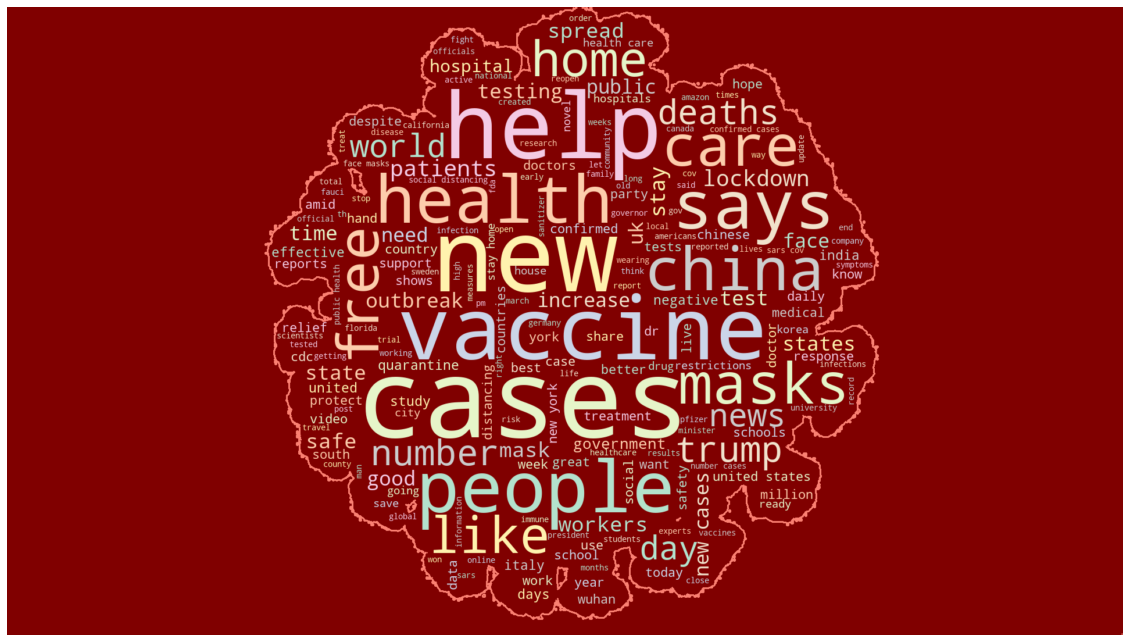

In [ ]:
text = bow.loc['positive'].sort_values(ascending=False).to_dict()
wordcloud = WordCloud(min_word_length=3, background_color='maroon', contour_color='salmon', contour_width=3, mask=covid_mask, colormap='Pastel2').generate_from_frequencies(text)
plot_cloud(wordcloud)

In [ ]:
# wordcloud.to_file('wordcloud_sub_positive_WF.png')

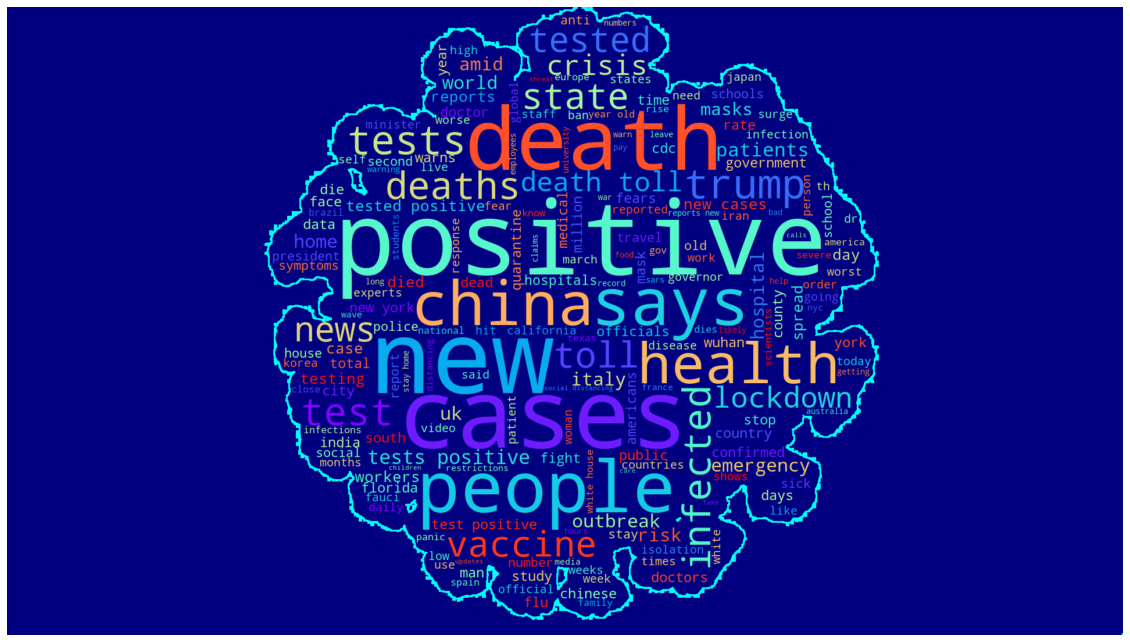

In [ ]:
text = bow.loc['negative'].sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width = 3000, height = 2000, min_word_length=3, background_color='navy', contour_color='cyan', contour_width=4, mask=covid_mask, colormap='rainbow')
wordcloud.generate_from_frequencies(text)
plot_cloud(wordcloud)

In [ ]:
# wordcloud.to_file('wordcloud_sub_negative_WF.png')

### 2) Utilising both word frequency and log odds ratio

In [ ]:
df_logodds = pd.DataFrame()

# By sentiment type, divide the number of times a word is seen by the total frequency of words in that sentiment
bow_transformed = bow.apply(lambda x: (x+1)/(bow.loc[x.name].sum()+1), axis=1)

2021-05-03 13:46:07,428 : INFO : NumExpr defaulting to 2 threads.


In [ ]:
for sentiment in tqdm(sentiment_types):
    feat_s = bow[bow.index != sentiment].sum() + 1
    feat_s_all = np.sum(bow[bow.index != sentiment].sum())
    tot = feat_s / feat_s_all
    row = bow_transformed.loc[sentiment] / tot
    row = pd.DataFrame(row).T
    results = row.apply(lambda x: math.log(x,2))

    df_logodds = pd.concat([df_logodds, pd.DataFrame([results], index=[sentiment])])

100%|██████████| 2/2 [04:02<00:00, 121.33s/it]


In [ ]:
# # Save dataframe
# df_logodds.to_pickle('submissions_sentiment_logodds.pkl')
# df_logodds = pd.read_pickle('submissions_sentiment_logodds.pkl')

In [ ]:
df_logodds.sort_values(by='positive', axis=1)

cases dead  total cases dead  new deaths raising  daily death toll  \
negative    7.838227          7.571834            7.371965          7.004420   
positive   -7.838229         -7.571835           -7.371966         -7.004421   

          uk death  uk death toll  positive trump  daily death  worst hit  \
negative  6.760691       6.530904        6.467245     6.330826   6.318853   
positive -6.760692      -6.530905       -6.467246    -6.330827  -6.318855   

          death toll passes  ...  investigation negative cases  \
negative           6.294606  ...                     -6.315958   
positive          -6.294607  ...                      6.315957   

          negative cases ontario  safe effective  negative cases  \
negative               -6.342925       -6.542234       -6.553822   
positive                6.342924        6.542232        6.553820   

          investigation negative  cases investigation negative   awesome  \
negative               -6.632432                     -6.632432 -6.927887   
positive                6.632430                      6.632430  6.927886   

          authority update deaths  authority update  health authority update  
negative                -7.302283         -7.654127                -7.654127  
positive                 7.302282          7.654125                 7.654125  

[2 rows x 2151767 columns]

In [ ]:
text_positive = df_logodds.loc['positive'].sort_values(ascending=False).to_dict()
text_negative = df_logodds.loc['negative'].sort_values(ascending=False).to_dict()

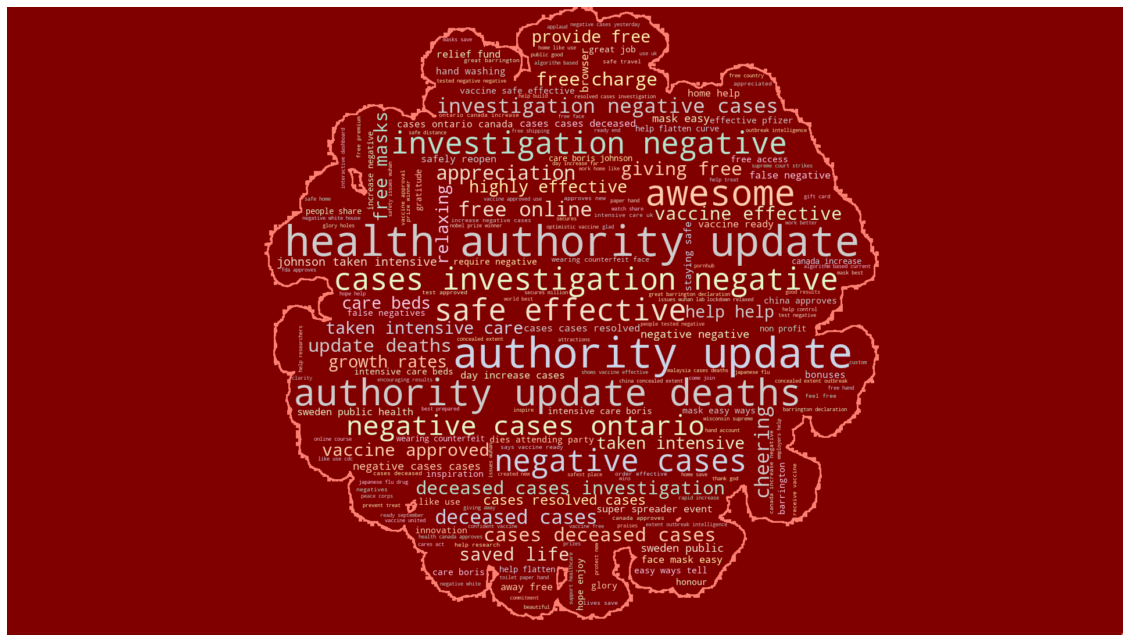

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, min_word_length=3, background_color='maroon', contour_color='salmon', contour_width=4, mask=mask_covid, colormap='Pastel2')
wordcloud.generate_from_frequencies(text_positive)
plot_cloud(wordcloud)

In [ ]:
# wordcloud.to_file('wordcloud_sub_positive_WFLO.png')

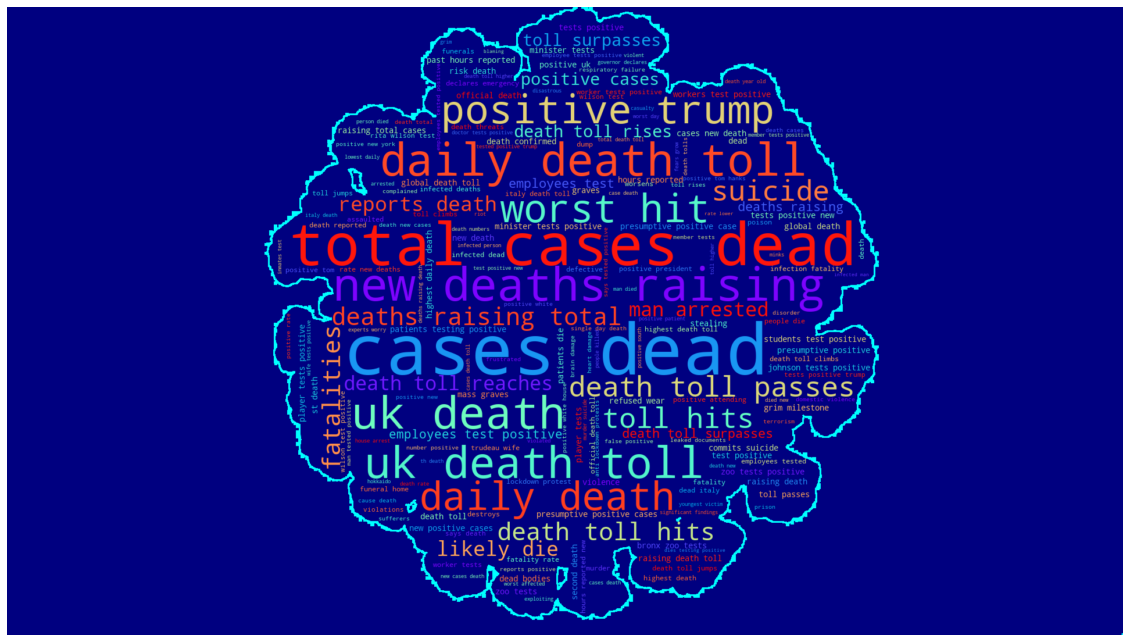

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, min_word_length=3, background_color='navy', contour_color='cyan', contour_width=4, mask=mask_covid, colormap='rainbow')
wordcloud.generate_from_frequencies(text_negative)
plot_cloud(wordcloud)

In [ ]:
# wordcloud.to_file('wordcloud_sub_negative_WFLO.png')

# Topic Modelling
-----

## Preprocess submission dataset for topic modelling
-----

In [ ]:
df = pd.read_pickle('pickle/submissions_processed.pkl')

### Filter data
- lemmatization
- tokenization
- remove stop words and common words
- remove tokens with less than 3 characters
- remove submissions with less than 5 tokens


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']):
    output = []
    doc = nlp(text)
    for token in doc:
        if token.pos_ in allowed_postags:
            output.append(token.lemma_)
    return(output)

def preprocess(text):
    processed_text = gensim.utils.simple_preprocess(text)
    for token in processed_text:
        if token in CUSTOM_STOPWORDS or len(token) < 3:
            processed_text.remove(token)
    # Join list of words to strings to lemmatize
    string = ' '.join([word for word in processed_text])
    return (lemmatization(string))

In [ ]:
# Remove words that overlap in topic modelling
def remove_common_words(_list):
    words_to_remove = ['covid', 'corona', 'coronavirus', 'pandemic', 'virus']
    clean_text = [x for x in _list if x not in words_to_remove]
    return clean_text

In [ ]:
processed_docs = df.title.map(preprocess)

In [ ]:
processed_docs = processed_docs.map(remove_common_words)

In [ ]:
processed_docs

0                                                                                       [should, start, worry, new, outbreak]
1                                                             [report, case, new, chinese, state, really, close, where, live]
3                                                       [join, china, flu, dedicate, monitor, current, china, outbreak, ncov]
5                                                                                                              [trump, fight]
6                                                                              [dow, fall, point, case, big, decline, boeing]
                                                                 ...                                                         
356685                                                                                        [cdc, library, science, update]
356686                                                            [novartis, agree, help, pfizer, biontech, produce, v

In [ ]:
# Find length of title in each row
processed_lengths = processed_docs.map(lambda x: len(x))
display(processed_lengths)
# Show rows with 5 or more tokens
display(processed_lengths.loc[lambda x: x>=5].index)

0          5
1          9
3          9
5          2
6          7
          ..
356685     4
356686     7
356687     3
356688     6
356689    13
Name: title, Length: 336905, dtype: int64

Int64Index([     0,      1,      3,      6,      8,     12,     15,     17,
                22,     23,
            ...
            356676, 356677, 356678, 356680, 356681, 356682, 356684, 356686,
            356688, 356689],
           dtype='int64', length=268109)

In [ ]:
processed_docs = processed_docs.loc[processed_lengths.loc[lambda x: x>=5].index]
processed_docs.shape

(268109,)

In [ ]:
# processed_docs_filtered.to_pickle('submissions_tokenized_filtered.pkl')
# processed_docs = pd.read_pickle('submissions_tokenized_filtered.pkl')

In [ ]:
processed_docs

0                                                                                       [should, start, worry, new, outbreak]
1                                                             [report, case, new, chinese, state, really, close, where, live]
3                                                       [join, china, flu, dedicate, monitor, current, china, outbreak, ncov]
6                                                                              [dow, fall, point, case, big, decline, boeing]
8                                                                        [russia, initiate, elaboration, vaccine, treat, new]
                                                                 ...                                                         
356682                                                             [pfizer, tell, canada, will, receive, vaccine, dose, week]
356684                                                                        [vietnam, record, new, community, transm

### Build dictionary and bag-of-words corpus

In [ ]:
token_list = processed_docs.to_list()

In [ ]:
bigram = Phrases(token_list, min_count=20, threshold=100, connector_words=ENGLISH_CONNECTOR_WORDS)
bigram_phraser = gensim.models.phrases.Phraser(bigram)
docs_with_bigrams = [bigram_phraser[doc] for doc in processed_docs]

In [ ]:
dictionary = corpora.Dictionary(docs_with_bigrams)

In [ ]:
len(dictionary)

48689

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.8, keep_n=100000)
print(dictionary)

Dictionary(16069 unique tokens: ['new', 'outbreak', 'should', 'start', 'worry']...)


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in docs_with_bigrams]

## Generate multiple LDA models and find optimal number of topics
-----

In [ ]:
def compute_coherence_values(dictionary, corpus, documents, start, limit, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dict : Gensim dictionary
    corp : Gensim corpus
    text : List of input texts

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    model_list = []
    coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=3)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=documents, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dict=dictionary, corp=bow_corpus, text=docs_with_bigrams, start=3, limit=15, step=2)

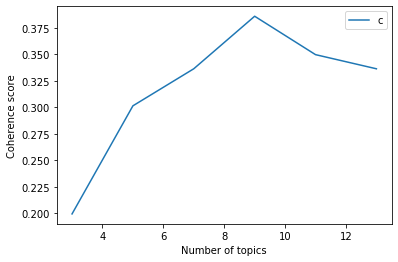

The model with num_topics = 3 has a coherence value of 0.199
The model with num_topics = 5 has a coherence value of 0.301
The model with num_topics = 7 has a coherence value of 0.336
The model with num_topics = 9 has a coherence value of 0.386
The model with num_topics = 11 has a coherence value of 0.350
The model with num_topics = 13 has a coherence value of 0.336


In [ ]:
# Show graph
limit=15; start=3; step=2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for model, value in zip(x, coherence_values):
    print(f'The model with num_topics = {model} has a coherence value of {value:.3f}')

## Build optimal model (9 topics)

In [ ]:
submissions_ldamodel = gensim.models.LdaMulticore(corpus=bow_corpus, id2word=dictionary, num_topics=9, workers=3, passes=20)

In [ ]:
'''
Save LDA model
'''
# submissions_ldamodel.save('models/submissions_ldamodel_full')

'''
Load LDA model
'''
# submissions_ldamodel = gensim.models.LdaMulticore.load('models/submissions_ldamodel_full')
# dictionary = gensim.corpora.Dictionary.load('models/submissions_ldamodel_full.id2word')

In [ ]:
data = [[topic, words] for topic, words in submissions_ldamodel.print_topics()]

df_topics = pd.DataFrame(
    data, columns = ['Topic', 'Words']
)

display(df_topics)

Topic  \
0      0   
1      1   
2      2   
3      3   
4      4   
5      5   
6      6   
7      7   
8      8   

                                                                                                                                                                                  Words  
0                             0.118*"case" + 0.110*"new" + 0.067*"death" + 0.047*"report" + 0.026*"day" + 0.025*"record" + 0.018*"high" + 0.016*"surge" + 0.014*"rise" + 0.014*"number"  
1                                0.064*"mask" + 0.024*"face" + 0.021*"wear" + 0.014*"make" + 0.014*"governor" + 0.013*"people" + 0.013*"go" + 0.012*"help" + 0.010*"get" + 0.009*"need"  
2                           0.041*"news" + 0.037*"health" + 0.033*"world" + 0.019*"live" + 0.018*"warn" + 0.017*"fauci" + 0.015*"care" + 0.015*"country" + 0.013*"say" + 0.012*"global"  
3                  0.031*"state" + 0.025*"school" + 0.022*"order" + 0.021*"public" + 0.019*"close" + 0.017*"health" + 0.015*"county" + 0.015*"california" + 0.015*"home" + 0.013*"open"  
4                        0.041*"hospital" + 0.040*"patient" + 0.037*"die" + 0.026*"doctor" + 0.020*"risk" + 0.020*"people" + 0.011*"child" + 0.010*"nurse" + 0.009*"drug" + 0.009*"man"  
5               0.028*"vaccine" + 0.026*"study" + 0.018*"say" + 0.013*"show" + 0.013*"cdc" + 0.012*"find" + 0.012*"scientist" + 0.011*"spread" + 0.011*"vaccination" + 0.010*"sars_cov"  
6                  0.104*"test" + 0.060*"positive" + 0.023*"variant" + 0.017*"student" + 0.011*"testing" + 0.009*"day" + 0.009*"school" + 0.008*"flight" + 0.008*"staff" + 0.008*"july"  
7  0.042*"trump" + 0.029*"lockdown" + 0.022*"reopen" + 0.018*"say" + 0.012*"travel" + 0.011*"quarantine" + 0.010*"rule" + 0.010*"restriction" + 0.010*"white_house" + 0.010*"president"  
8                    0.106*"vaccine" + 0.017*"worker" + 0.015*"dose" + 0.014*"pfizer" + 0.014*"trial" + 0.013*"say" + 0.009*"moderna" + 0.007*"medical" + 0.007*"receive" + 0.007*"get"

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(submissions_ldamodel, bow_corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
'''
Save pyLDAvis visualisation
'''
# pyLDAvis.save_html(vis, 'visualisations/submissions_ldamodel_9topics.html')

## Analyse LDA model

### Merging topics with sentiment score
-----

In [ ]:
df_main = pd.read_pickle('pickle/submissions_sentiment.pkl')

In [ ]:
index_to_merge = processed_docs.index
print(index_to_merge)
df_docsforLDA = df_main.loc[index_to_merge]

Int64Index([     0,      1,      3,      6,      8,     12,     15,     17,
                22,     23,
            ...
            356676, 356677, 356678, 356680, 356681, 356682, 356684, 356686,
            356688, 356689],
           dtype='int64', length=268109)


### Finding the dominant topic in each document
-----

In [ ]:
df_docsforLDA

id  score  num_comments  created_utc  \
0       erj61t      1            94   1579552351   
1       es0m55      1            32   1579638986   
3       es2ooq      1             1   1579647443   
6       escvbz      1             0   1579704068   
8       esi5ef      1             3   1579726949   
...        ...    ...           ...          ...   
356682  l9ehq1      0            12   1612107018   
356684  l9esp4     17             2   1612107908   
356686  l9ev4o    386            87   1612108101   
356688  l9ex9u    157            74   1612108271   
356689  l9f3g9     55            13   1612108780   

                                                                                                                                          title  \
0                                                                                   When should we start to get worried about the new outbreak?   
1                            When the first reported US case of the new Chinese Coronavirus is in your state and really close to where you live   
3                                                                          Join r China Flu dedicated to monitoring current China outbreak nCoV   
6                                                            Dow falls more than points amid first US case of coronavirus big decline in Boeing   
8                                                                    Russia initiated the elaboration of a vaccine to treat the new coronavirus   
...                                                                                                                                         ...   
356682                                                                Pfizer tells Canada it will not receive any Covid vaccine doses next week   
356684                                                                                        Vietnam records new Covid community transmissions   
356686                                                                            Novartis agrees to help Pfizer BioNTech produce Covid vaccine   
356688                                                           Brazil researchers find people infected with two different coronavirus strains   
356689  SARS CoV infection among healthcare workers despite the use of surgical masks and physical distancing the role of airborne transmission   

          month       week  compound_score sentiment  score_weighted_sentiment  
0       2020-01  2020-Wk03         -0.2960  negative                   -0.0891  
1       2020-01  2020-Wk03          0.0000   neutral                    0.0000  
3       2020-01  2020-Wk03          0.3818  positive                    0.1149  
6       2020-01  2020-Wk03          0.0000   neutral                    0.0000  
8       2020-01  2020-Wk03          0.4019  positive                    0.1210  
...         ...        ...             ...       ...                       ...  
356682  2021-01  2021-Wk04          0.0000   neutral                    0.0000  
356684  2021-01  2021-Wk04          0.0000   neutral                    0.0000  
356686  2021-01  2021-Wk04          0.5423  positive                    1.4033  
356688  2021-01  2021-Wk04         -0.6597  negative                   -1.4505  
356689  2021-01  2021-Wk04          0.0000   neutral                    0.0000  

[268109 rows x 10 columns]

In [ ]:
def maintopic_in_doc (ldamodel, corpus, df):
    df_docswithtopic = pd.DataFrame()

    for corpus, topics in enumerate(ldamodel[corpus]):
        topics = sorted(topics, key=lambda x: (x[1]), reverse=True)
        # row[0] has highest topic weight
        for index, (topic_num, weight) in enumerate(topics):
            if index == 0:
                df_docswithtopic = df_docswithtopic.append(pd.Series([topic_num, round(weight, 3)]), ignore_index=True)
            else:
                break
    df_docswithtopic.columns = ['dominant_topic', 'weight']
    df_docswithtopic['dominant_topic'] = df_docswithtopic['dominant_topic'].astype('int32')

    df_maintopicindoc = pd.concat([df, df_docswithtopic.set_index(df_docsforLDA.index)], axis=1)
    return(df_maintopicindoc)

In [ ]:
df_STW = maintopic_in_doc(submissions_ldamodel, bow_corpus, df_docsforLDA)

In [ ]:
# df_STW.to_pickle('pickle/submissions_sentiment_topic_weight.pkl')
# df_STW = pd.read_pickle('pickle/submissions_sentiment_topic_weight.pkl')

In [ ]:
display(df_STW)

id  score  num_comments  created_utc  \
0       erj61t      1            94   1579552351   
1       es0m55      1            32   1579638986   
3       es2ooq      1             1   1579647443   
6       escvbz      1             0   1579704068   
8       esi5ef      1             3   1579726949   
...        ...    ...           ...          ...   
356682  l9ehq1      0            12   1612107018   
356684  l9esp4     17             2   1612107908   
356686  l9ev4o    386            87   1612108101   
356688  l9ex9u    157            74   1612108271   
356689  l9f3g9     55            13   1612108780   

                                                                                                                                          title  \
0                                                                                   When should we start to get worried about the new outbreak?   
1                            When the first reported US case of the new Chinese Coronavirus is in your state and really close to where you live   
3                                                                          Join r China Flu dedicated to monitoring current China outbreak nCoV   
6                                                            Dow falls more than points amid first US case of coronavirus big decline in Boeing   
8                                                                    Russia initiated the elaboration of a vaccine to treat the new coronavirus   
...                                                                                                                                         ...   
356682                                                                Pfizer tells Canada it will not receive any Covid vaccine doses next week   
356684                                                                                        Vietnam records new Covid community transmissions   
356686                                                                            Novartis agrees to help Pfizer BioNTech produce Covid vaccine   
356688                                                           Brazil researchers find people infected with two different coronavirus strains   
356689  SARS CoV infection among healthcare workers despite the use of surgical masks and physical distancing the role of airborne transmission   

          month       week  compound_score sentiment  \
0       2020-01  2020-Wk03         -0.2960  negative   
1       2020-01  2020-Wk03          0.0000   neutral   
3       2020-01  2020-Wk03          0.3818  positive   
6       2020-01  2020-Wk03          0.0000   neutral   
8       2020-01  2020-Wk03          0.4019  positive   
...         ...        ...             ...       ...   
356682  2021-01  2021-Wk04          0.0000   neutral   
356684  2021-01  2021-Wk04          0.0000   neutral   
356686  2021-01  2021-Wk04          0.5423  positive   
356688  2021-01  2021-Wk04         -0.6597  negative   
356689  2021-01  2021-Wk04          0.0000   neutral   

        score_weighted_sentiment  dominant_topic  weight  
0                        -0.0891               1   0.371  
1                         0.0000               0   0.355  
3                         0.1149               5   0.548  
6                         0.0000               0   0.700  
8                         0.1210               8   0.327  
...                          ...             ...     ...  
356682                    0.0000               8   0.769  
356684                    0.0000               0   0.852  
356686                    1.4033               8   0.730  
356688                   -1.4505               5   0.721  
356689                    0.0000               5   0.406  

[268109 rows x 12 columns]

In [ ]:
# df_STW.groupby(['month','dominant_topic']).size().sort_index().head(20)

In [ ]:
df_representativedoc = pd.DataFrame()

df_groupedtopics = df_STW.groupby('dominant_topic')

for i, group in df_groupedtopics:
    df_representativedoc = pd.concat([df_representativedoc, group.sort_values(['weight'], ascending=False).head(1)], axis=0)

In [ ]:
'''
Run/modify this to observe submissions in each topic
'''

# df_STW[df_STW['dominant_topic']==1].sort_values(by='score', ascending=False).head(20)

In [ ]:
df_weightmonth = df_STW.groupby(['month','dominant_topic']).size().reset_index(name='size')

In [ ]:
# Label themes
themes = ['Infection rate & death toll', 'Face masks & other preventive measures', 'Global news', 'Government Stay-At-Home orders', 'COVID-19 patients, risks of infection & drugs', 'Spread of COVID-19', 'Testing & positive cases', 'Lockdown & travel restrictions', 'Medical supplies & vaccines']

In [ ]:
df_weightmonth['theme'] = themes * 13

In [ ]:
def f(df, month, size):
    commentsinmonth = df[df['month'] == month]['size'].sum()
    weight = round(size/commentsinmonth, 5)
    return weight

In [ ]:
df_weightmonth['weight_month'] = df_weightmonth.apply(lambda x: f(df_weightmonth, x['month'], x['size']), axis=1)

In [ ]:
df_weightmonth

month  dominant_topic  size  weight_month  \
0    2020-01               0   211       0.10399   
1    2020-01               1   493       0.24298   
2    2020-01               2   177       0.08724   
3    2020-01               3    71       0.03499   
4    2020-01               4   173       0.08526   
..       ...             ...   ...           ...   
112  2021-01               4   682       0.07761   
113  2021-01               5  1797       0.20448   
114  2021-01               6   548       0.06236   
115  2021-01               7   844       0.09604   
116  2021-01               8  1683       0.19151   

                                             theme  
0                      Infection rate & death toll  
1           Face masks & other preventive measures  
2                                      Global news  
3                   Government Stay-At-Home orders  
4    COVID-19 patients, risks of infection & drugs  
..                                             ...  
112  COVID-19 patients, risks of infection & drugs  
113                             Spread of COVID-19  
114                       Testing & positive cases  
115                 Lockdown & travel restrictions  
116                    Medical supplies & vaccines  

[117 rows x 5 columns]

In [ ]:
topics = df_weightmonth['dominant_topic'].unique()
months = df_weightmonth['month'].unique()

fig = go.Figure()

for topic in topics:
    fig.add_trace(go.Scatter(x=months, y=df_weightmonth[df_weightmonth['dominant_topic']==topic]['weight_month'], mode='lines', name=df_weightmonth[df_weightmonth['dominant_topic']==topic].theme.unique()[0]))

fig.show()

In [ ]:
months = df_weightmonth['month'].unique()

fig = go.Figure()

fig.add_trace(go.Scatter(x=months, y=df_weightmonth[df_weightmonth['dominant_topic']==1]['weight_month'], mode='lines', line_color='#00CC96', name='Face masks & other preventive measures', showlegend=True))

fig.add_trace(go.Scatter(x=months, y=df_weightmonth[df_weightmonth['dominant_topic']==8]['weight_month'], mode='lines', line_color='#19D3F3', name='Medical supplies & vaccines', showlegend=True))

fig.show()

In [ ]:
months = df_weightmonth['month'].unique()

fig = go.Figure()

fig.add_trace(go.Scatter(x=months, y=df_weightmonth[df_weightmonth['dominant_topic']==8]['weight_month'], mode='lines', line_color='#19D3F3', name='Medical supplies & vaccines', showlegend=True))

fig.show()

In [ ]:
from plotly.subplots import make_subplots

rows = 5
columns = 2

fig = make_subplots(rows=rows, cols=columns, shared_yaxes=True)

for topic in topics:
    fig.add_trace(go.Scatter(x=months, y=df_weightmonth[df_weightmonth['dominant_topic']==topic]['weight_month'], mode='lines', name=df_weightmonth[df_weightmonth['dominant_topic']==topic].theme.unique()[0]), row=(topic//columns)+1, col=(topic%columns)+1)


fig.update_layout(
    height=1000,
    width=1000,
    title_text="Topic distribution of submissions",
    # colorway=px.colors.qualitative.D3
    colorway=['#636EFA', '#00CC96', '#B6E880', '#FFA15A', '#FF6692', '#EF553B', '#FF97FF', '#AB63FA', '#19D3F3']
    )

fig.update_yaxes(title_text="Percentage", range=[0, .3])
fig.show()

### Topic distribution across Submissions
-----

In [ ]:
# Number of Documents for each topic
topic_counts = df_STW['dominant_topic'].value_counts().sort_index()
# Percentage of Documents for each topic
topic_contribution = round(topic_counts/topic_counts.sum(), 3)

2021-04-13 11:51:20,881 : INFO : NumExpr defaulting to 4 threads.


In [ ]:
df_topicdistribution = pd.concat([topic_counts, topic_contribution], axis=1)
df_topicdistribution.index.names = ['topic']
df_topicdistribution.columns = ['number_of_submissions', 'percentage']

In [ ]:
df_topicdistribution

number_of_submissions  percentage
topic                                   
0                      40795       0.152
1                      35856       0.134
2                      22903       0.085
3                      26527       0.099
4                      23431       0.087
5                      36946       0.138
6                      21670       0.081
7                      33688       0.126
8                      26293       0.098

In [ ]:
fig = px.pie(df_topicdistribution, values='percentage', names=themes, title='Proportion of submission topics', hole=0.5)
fig.show()